In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from discrete_basics import *
from discrete_plot import *
from discrete_sim import *
from scipy.integrate import solve_ivp
from cycler import cycler

plt.rcParams['axes.prop_cycle']=cycler('color',['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
mpl.rcParams['backend'] = 'pdf'
mpl.rc('font',**{'family':'serif'})
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb,amsmath,wasysym}')
plt.rcParams['font.size'] = 16

location = "lintest/"
try:
    os.makedirs(location)
except(FileExistsError):
    pass

# Linearity test

In [11]:
tol = 0.1
a,b,c,d = -10, 2, 15, -5
solutions = minima(a,b,c,d)
resolution = 100
dx = 1.0
phi = 30
for method in [(mesh_reg, rhs_reg),(mesh_hex, rhs_hex),(mesh_tri, rhs_tri)]:
    res, xv, yv = method[0](resolution)
    for i,j in [(0,1),(0,2),(1,2)]: #front solutions
        results = []
        z = inistripe(xv,yv,resolution,phi,solutions[i],solutions[j])
        filename = method[0].__name__[-3:]+"{}_{}u{}{}_{}_{}_c{:.2f}_d{}.txt".format(resolution,phi,i,j,a,b,c,d)
        if not os.path.isfile(location+filename+".txt"):
            for coup in [4,6,8,10]:
                diff = coup*dx**2#
                z1 = z.flatten()
                timeplus=0
                for tlimit in [(0.1,0.0001),(5,0.01),(10,0.02)]:
                    tstep = tlimit[1]
                    t = 0
                    while (t*tstep+timeplus)<tlimit[0]:
                        print("{}_front u_{}{}, D = {}, t = {}".format(method[0].__name__[-3:],i,j,diff,t*tstep+timeplus), end="\r")
                        try:
                            reso = solve_ivp(method[1],[0,tstep],z1,'LSODA',args=((a,b,c,d,diff,dx,res),))
                            z1 = reso.y[:,-1]
                            N_1 = len(z1[np.abs(z1-solutions[i])<tol]) #all of z being u_ini[0]
                            N_2 = len(z1[np.abs(z1-solutions[j])<tol]) #all of z being u_ini[1]
                            mask = np.array(np.abs(z1-solutions[i])>tol) * np.array(np.abs(z1-solutions[j])>tol)#all points in front
                            M = np.sum(z1-z.flatten())
                            error, distance = vecfitter(xv.flatten()[mask],yv.flatten()[mask],phi)
                            results.append([timeplus+t*tstep, coup, distance, N_1, N_2, M])
                            t = t+1
                        except(MemoryError):
                            fig, ax = plt.subplots(1,1,figsize = (1,1))
                            plt.close()
                    timeplus = timeplus+t*tstep
            results = np.asarray(results)
            np.savetxt(location+filename, results)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


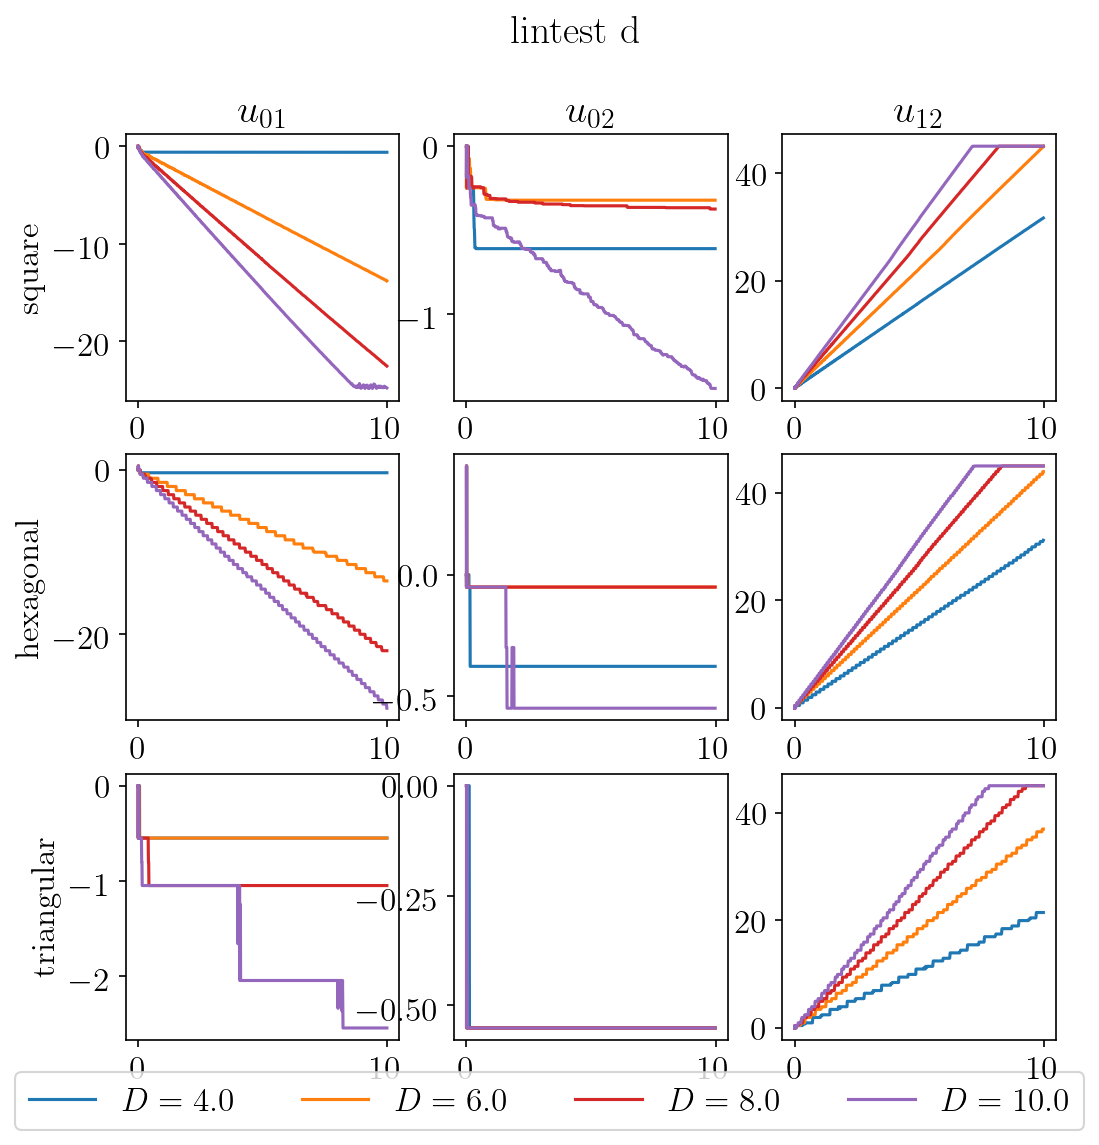

In [45]:
tol = 0.1
a,b,c,d = -10, 2, 15, -5
solutions = minima(a,b,c,d)
resolution = 100
dx = 1.0
phi = 30

fig, axs = plt.subplots(3, 3,figsize = (8,8),dpi=150)
for method in [('reg', 4,0),('hex', 6,1),('tri', 3,2)]:
    for i,j in [(0,1),(0,2),(1,2)]: #front solutions
        filename = method[0]+"{}_{}u{}{}_{}_{}_c{:.2f}_d{}.txt".format(resolution,phi,i,j,a,b,c,d)
        data = np.loadtxt(location+filename)
        for coup in [4,6,8,10]:
            diff = coup*dx**2
            mask = (data[:,1]==coup) 
            data1 = data[mask]
            axs[method[2],i+j-1].plot(data1[:,0],data1[:,2],label=r'$D ={}$'.format(diff))
    axs[2,1].legend(loc="lower center",bbox_to_anchor=(0., -0.4, 0.7, -0), ncol=5)
    axs[0,0].set_ylabel(r'square')
    axs[1,0].set_ylabel(r'hexagonal')
    axs[2,0].set_ylabel(r'triangular')

    axs[0,0].set_title(r'$u_{01}$')
    axs[0,1].set_title(r'$u_{02}$')
    axs[0,2].set_title(r'$u_{12}$')
fig.suptitle("lintest d")
fig.savefig("SM_lintest3_{}_{}u_{}_{}_c{:.2f}_d{}.pdf".format(resolution,phi,a,b,c,d))
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


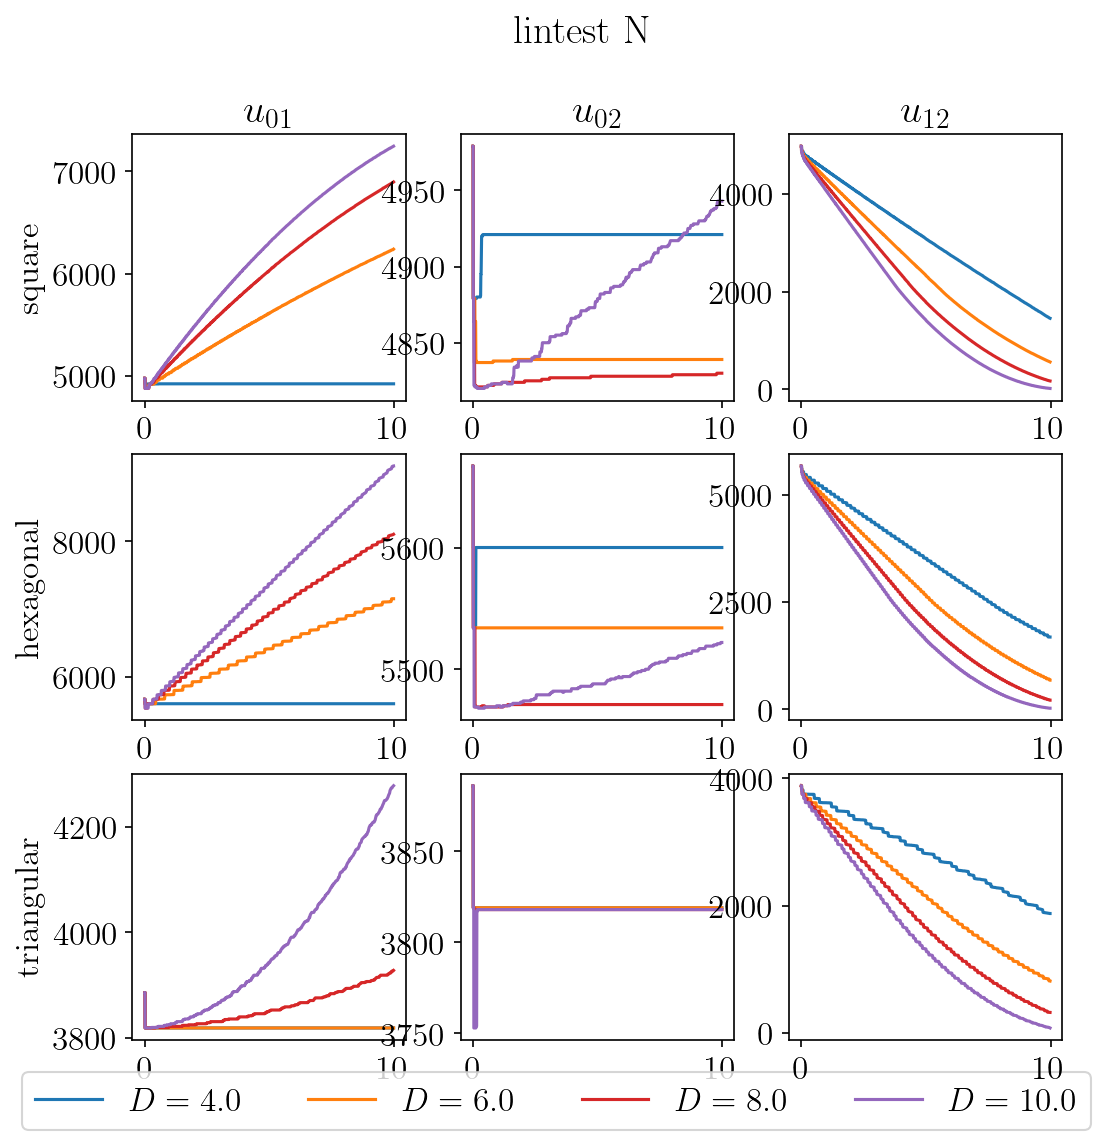

In [44]:
tol = 0.1
a,b,c,d = -10, 2, 15, -5
solutions = minima(a,b,c,d)
resolution = 100
dx = 1.0
phi = 30

fig, axs = plt.subplots(3, 3,figsize = (8,8),dpi=150)
for method in [('reg', 4,0),('hex', 6,1),('tri', 3,2)]:
    for i,j in [(0,1),(0,2),(1,2)]: #front solutions
        filename = method[0]+"{}_{}u{}{}_{}_{}_c{:.2f}_d{}.txt".format(resolution,phi,i,j,a,b,c,d)
        data = np.loadtxt(location+filename)
        for coup in [4,6,8,10]:
            diff = coup*dx**2
            mask = (data[:,1]==coup) 
            data1 = data[mask]
            axs[method[2],i+j-1].plot(data1[:,0],data1[:,3],label=r'$D ={}$'.format(diff))
    axs[2,1].legend(loc="lower center",bbox_to_anchor=(0., -0.4, 0.7, -0), ncol=5)
    axs[0,0].set_ylabel(r'square')
    axs[1,0].set_ylabel(r'hexagonal')
    axs[2,0].set_ylabel(r'triangular')

    axs[0,0].set_title(r'$u_{01}$')
    axs[0,1].set_title(r'$u_{02}$')
    axs[0,2].set_title(r'$u_{12}$')
fig.suptitle("lintest N")
fig.savefig("SM_lintest1_{}_{}u_{}_{}_c{:.2f}_d{}.pdf".format(resolution,phi,a,b,c,d))
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


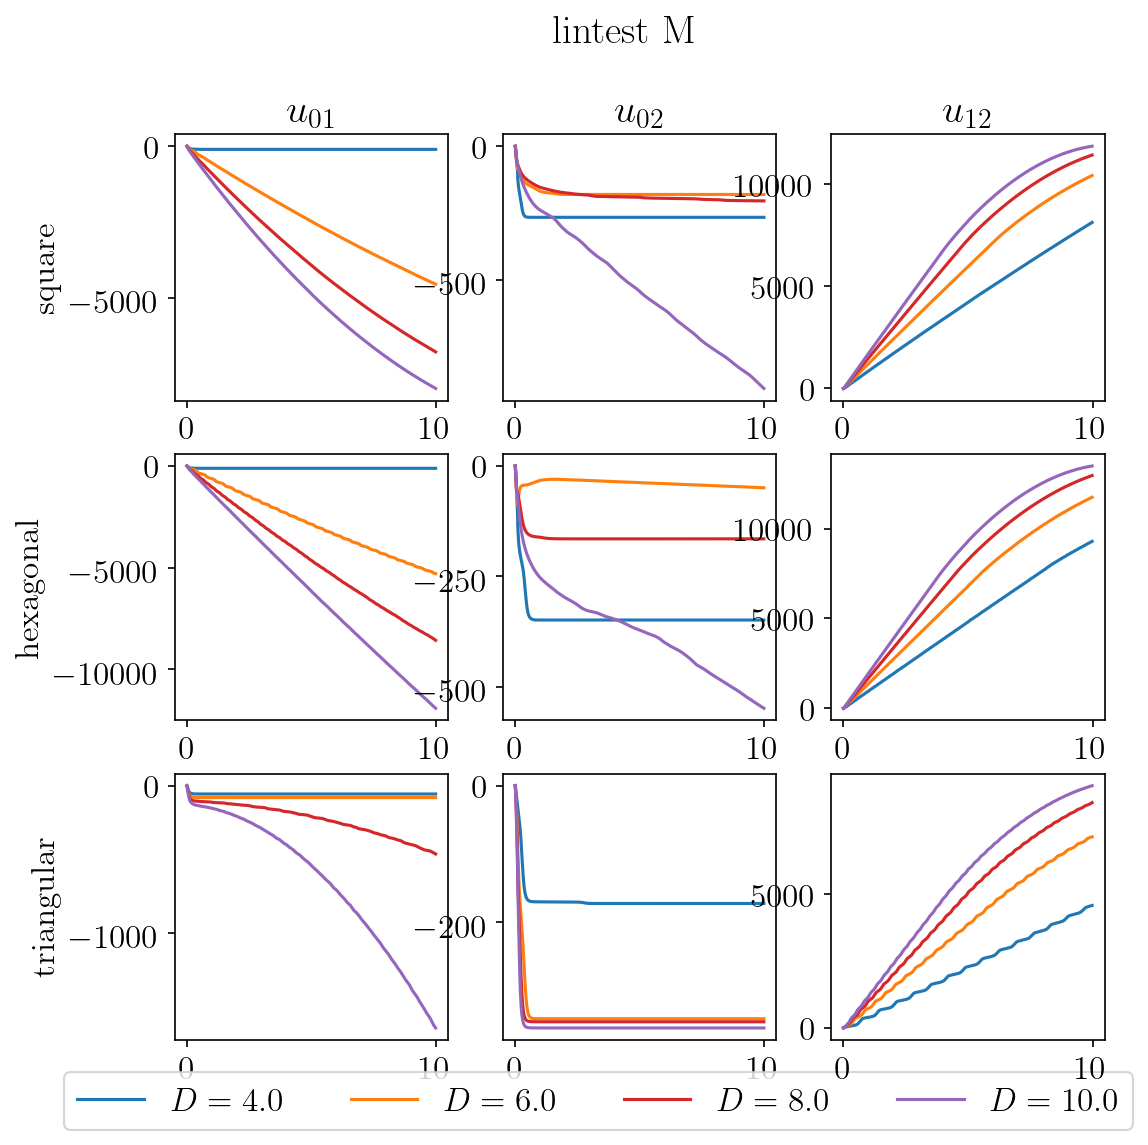

In [43]:
tol = 0.1
a,b,c,d = -10, 2, 15, -5
solutions = minima(a,b,c,d)
resolution = 100
dx = 1.0
phi = 30

fig, axs = plt.subplots(3, 3,figsize = (8,8),dpi=150)
for method in [('reg', 4,0),('hex', 6,1),('tri', 3,2)]:
    for i,j in [(0,1),(0,2),(1,2)]: #front solutions
        filename = method[0]+"{}_{}u{}{}_{}_{}_c{:.2f}_d{}.txt".format(resolution,phi,i,j,a,b,c,d)
        data = np.loadtxt(location+filename)
        for coup in [4,6,8,10]:
            diff = coup*dx**2
            mask = (data[:,1]==coup) 
            data1 = data[mask]
            axs[method[2],i+j-1].plot(data1[:,0],data1[:,5],label=r'$D ={}$'.format(diff))
    axs[2,1].legend(loc="lower center",bbox_to_anchor=(0., -0.4, 0.7, -0), ncol=5)
    axs[0,0].set_ylabel(r'square')
    axs[1,0].set_ylabel(r'hexagonal')
    axs[2,0].set_ylabel(r'triangular')

    axs[0,0].set_title(r'$u_{01}$')
    axs[0,1].set_title(r'$u_{02}$')
    axs[0,2].set_title(r'$u_{12}$')
fig.suptitle("lintest M")
fig.savefig("SM_lintest2_{}_{}u_{}_{}_c{:.2f}_d{}.pdf".format(resolution,phi,a,b,c,d))
plt.show()